# Display Physionet Recordings using Wavelets - UC

see: https://physionet.org/physiobank/database/ctu-uhb-ctgdb/


Questions:
- Is this a useful way to remove noise
- Is this ia useful way to extract patterns

In [1]:
import config_local
from config_common import *

In [2]:
import wfdb
import os
from pprint import pprint

import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.signal

import pywt

In [3]:
from ctg_utils import get_all_recno, parse_meta_comments
from swt_filter import swt_align, replace_invalid_values, swt_process_signal, swt_process_uc_signal

# Code

In [4]:
def filtUC(data, lowcut, fs=4, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    b, a = scipy.signal.butter(order, low, btype='lowpass')
    y = scipy.signal.filtfilt(b, a, data)
    return y

In [5]:
local_recordings_dir_full

'/Users/Test/Documents/GitHub/CTG_Analysis/local_data/sample_physionet_ctb_uhb_recordings'

In [6]:
!ls /Users/Test/Documents/GitHub/CTG_Analysis/local_data/sample_physionet_ctb_uhb_recordings

1001.dat 1001.hea 1002.dat 1002.hea


## Process Recordings


Record: 1001
nSamples: 19200


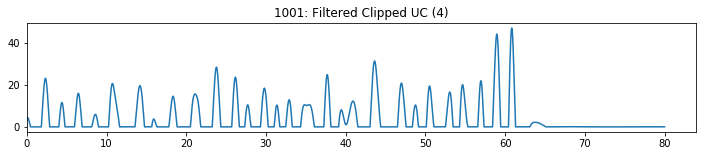

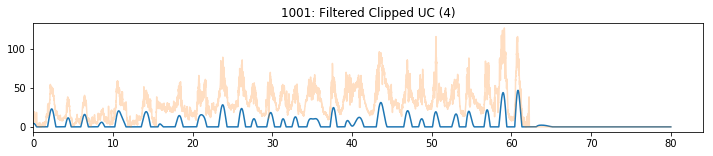


Record: 1002
nSamples: 19200


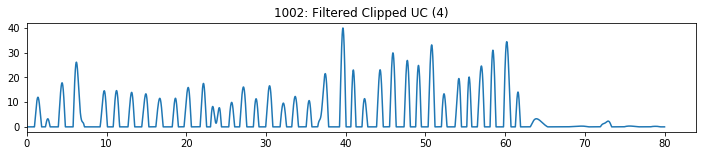

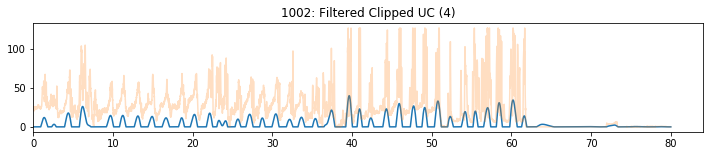

In [7]:
uc_total_levels=11
uc_exclude_before=2
uc_exclude_detail_level = 4

for recno in sorted(get_all_recno(local_recordings_dir_full)):
    recno_full = os.path.join(local_recordings_dir_full, recno)
    print('\nRecord: {}'.format(recno))
    all_sig, meta = wfdb.io.rdsamp(recno_full)
    print('nSamples: {}'.format(all_sig.shape[0]))
    
    sig_hr = np.copy(all_sig[:, 0])
    sig_uc = all_sig[:, 1]
    
    sig_uc_f, ts = swt_process_uc_signal(sig_uc, exclude_detail_level=uc_exclude_detail_level, 
                                         exclude_before=uc_exclude_before,
                                         total_levels=uc_total_levels, fs=meta['fs'])
    tm = ts/60.0

    plt.figure(figsize=(12, 2))
    plt.title('{}: Filtered Clipped UC ({})'.format(recno, uc_exclude_detail_level))
    plt.plot(tm, sig_uc_f)
    #plt.plot(tm, sig_uc, alpha=0.25)
    plt.xlim(0,)
    plt.show()

    plt.figure(figsize=(12, 2))
    plt.title('{}: Filtered Clipped UC ({})'.format(recno, uc_exclude_detail_level))
    plt.plot(tm, sig_uc_f)
    plt.plot(tm, sig_uc, alpha=0.25)
    plt.xlim(0,)
    plt.show()  